# Lab 2- Numpy

Read through the following notebook to get an introduction to numpy: [Numpy Intro](jrjohansson-lectures/Lecture-2-Numpy.ipynb)

## Exercise 2.1

Let start with some basic reshape manipulations. Consider a classification task. We can imagine the training data X consisting of N examples each with M inputs, so the shape of X is (M,N). We usually express the output of the Neural Network, which for the training sample encodes the true class of each of the M examples in X, in a "one-hot" matrix of shape (N,C), where C is the number of classes and each row corresponds to the true class for the corresponding example in X. So for a given row Y[i], all elements are 0 except for the column corresponding to the true class.

For example consider a classification task of separating between 4 classes. We'll call them A, B, C, and D.


In [2]:
import numpy as np

Y=np.array( [ [0, 1, 0, 0], # Class B
              [1, 0, 0, 0], # Class A
              [0, 0, 1, 0], # Class C
              [0, 0, 0, 1]  # Class D
            ])

print "Shape of Y:", Y.shape

Shape of Y: (4, 4)


Lets imagine that we want to change to a 2 classes instead by combining classes A with B and C with D. Use np.reshape and np.sum to create a new vector Y1. Hint: change the shape of Y into (8,2), sum along the correct axes, and change shape to (4,2).

In [3]:
Y1= Y.reshape(8,2) # Replace Y with operations on Y which result in the requested answer. 
Y1= np.sum(Y1, axis=1)
print Y1.reshape(4, 2)

[[1 0]
 [1 0]
 [0 1]
 [0 1]]


## Exercise 2.2

Oftentimes we find that neutral networks work best when their input is mostly between 0,1. Below, we create a random dataset that is normal distributed (mean of 4, sigma of 10). Shift the data so that the mean is 0.5 and 68% of the data lies between 0 and 1.

3.97237926443
-37.7104415774
39.3553595419
New mean: 0.5


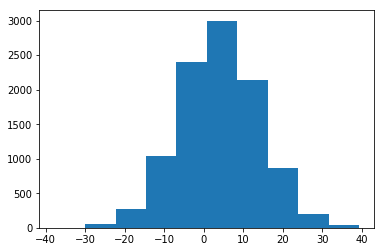

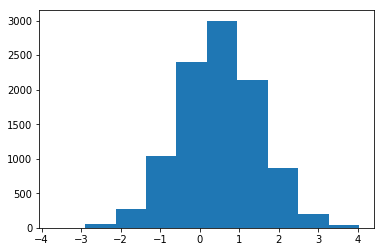

In [4]:
mean = 4
sigma = 10
X=np.random.normal(mean, sigma, 10000)

print np.mean(X)
print np.min(X)
print np.max(X)

X_new=((X - np.mean(X))/sigma)+0.5

print "New mean: " + str(np.mean(X_new))
import matplotlib.pyplot as plt
plt.hist(X)
plt.show()
plt.hist(X_new)
plt.show()

In [5]:
X1=X_new # Replace X with your answer

## Exercise 2.3

Using np.random.random and np.random.normal to generate two datasets. Then use np.where to repeat exercise 1.4 showing that one creates a flat distribution and the other does not. 

For the random distribution, over intervals of 0.2, the standard deviation is: 11.2960169972


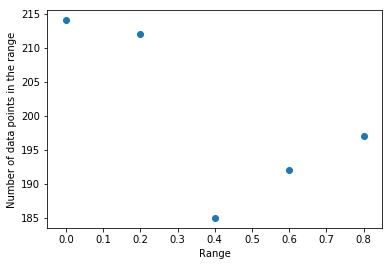

For the normal distribution, over intervals of 0.2, the standard deviation is: 249.64614958


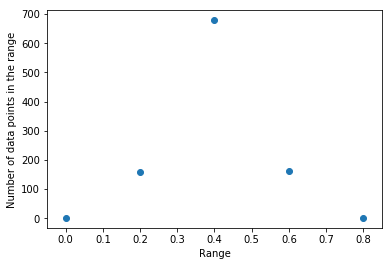

In [6]:
# Your solution here
X_random = np.random.random(1000)
X_normal = np.random.normal(0.5, 0.1, 1000)

#arrays to add number of data points in a given range
data_rand = [] 
data_norm = []
for x in np.arange(0.0, 1.0, 0.2):
    y = x+0.2
    data_rand.append(len(np.where((X_random <= y) & (X_random >= x))[0]))
    data_norm.append(len(np.where((X_normal <= y) & (X_normal >= x))[0]))

print "For the random distribution, over intervals of 0.2, the standard deviation is: " + str(np.std(np.array(data_rand)))
plt.xlabel("Range")
plt.ylabel("Number of data points in the range")
plt.scatter(np.arange(0.0, 1.0, 0.2), data_rand)
plt.show()
print "For the normal distribution, over intervals of 0.2, the standard deviation is: " + str(np.std(np.array(data_norm)))
plt.xlabel("Range")
plt.ylabel("Number of data points in the range")
plt.scatter(np.arange(0.0, 1.0, 0.2), data_norm)
plt.show()

## Exercise 2.4

Now lets play with some real data. We will load a file of example Neutrino interactions in LArTPC detector. There are 2 read out planes in the detector with 240 wires each, sampled 4096 times. Shift the images in the same way as exercise 2.2.

In [7]:
import h5py
f=h5py.File("/data/LArIAT/h5_files/nue_CC_3-1469384613.h5","r")
print f.keys()
images=f["features"]
print images.shape

[u'Eng', u'Track_length', u'enu_truth', u'features', u'lep_mom_truth', u'mode_truth', u'pdg']
(2500, 2, 240, 4096)


In [8]:
#new_images = np.empty(np.shape(images))
print np.max(images)-np.min(images)
#new_images = ((images - np.mean(images))/1024)+0.5
"""
for image in range(0, np.shape(images)[0]):
    for plane in range(0, np.shape(images)[1]):
        for wire in range(0, np.shape(images)[2]):
            samples = []
            for sample in range(0, np.shape(images)[3]):
                samples.append(images[image][plane][wire][sample])
            samples_new = copy.deepcopy(samples)
            for j in range(len(samples_new)):
                samples_new[j] = samples_new[j]/(0.68 * np.max(samples))
            mean = np.mean(samples_new)
            for i in range(len(samples_new)):
                samples_new[i] = (samples_new[i] - mean + 0.5)
            new_images[image][plane][wire] = samples_new
"""

5032.0


'\nfor image in range(0, np.shape(images)[0]):\n    for plane in range(0, np.shape(images)[1]):\n        for wire in range(0, np.shape(images)[2]):\n            samples = []\n            for sample in range(0, np.shape(images)[3]):\n                samples.append(images[image][plane][wire][sample])\n            samples_new = copy.deepcopy(samples)\n            for j in range(len(samples_new)):\n                samples_new[j] = samples_new[j]/(0.68 * np.max(samples))\n            mean = np.mean(samples_new)\n            for i in range(len(samples_new)):\n                samples_new[i] = (samples_new[i] - mean + 0.5)\n            new_images[image][plane][wire] = samples_new\n'